## Exploratory Data Analysis

#### In this project, I will perform exploratory data analysis on coaster dataset.

### 0. Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns', 200)

In [2]:
df = pd.read_csv("/kaggle/input/rollercoaster/coaster_db.csv")
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


### 1. Understanding the data

Checking number of rows and columns.

In [3]:
df.shape

(1087, 56)

Checking type od data

In [4]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

Performing basic statistical calculations on numerical columns.

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### 2. Data preparation & cleaning

This dataset has too much columns. In this analysis, I will not need all of them, therefore, I will keep only those columns that are interesting for analysis.

In [6]:
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [7]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

I will change opening_date_clean to date data type.

In [8]:
pd.to_datetime(df['opening_date_clean'])

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

I will rename columns, in order to be standardized.

In [9]:
df=df.rename(columns={'coaster_name': "Coaster_Name",
                   'year_introduced': "Year_Introduced",
                  'latitude':"Latitude", 'longitude':"Longitude",
                  'opening_date_clean':"Opening_Date", 'speed_mph':"Speed_mph",
                  'height_ft':"Height_ft", 'Inversions_clean':"Inversions",'Gforce_clean':"Gforce"})

Checking null values inside new dataset.

In [10]:
df.isnull().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

Checking duplicates.

In [11]:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [12]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [13]:
# Removing duplicates
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location', 'Opening_Date'])]\
    .reset_index(drop=True).copy()

### 3. Understanding the feature

#### Grouping data by the year introduced and showing graphically.

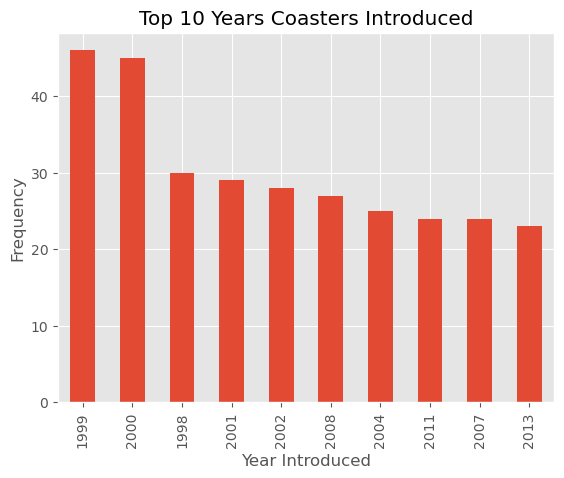

In [14]:
graph1 = df['Year_Introduced'].value_counts() \
.head(10) \
.plot(kind='bar', title='Top 10 Years Coasters Introduced')
graph1.set_xlabel('Year Introduced')
graph1.set_ylabel('Frequency')
plt.show()

#### Plotting histogram

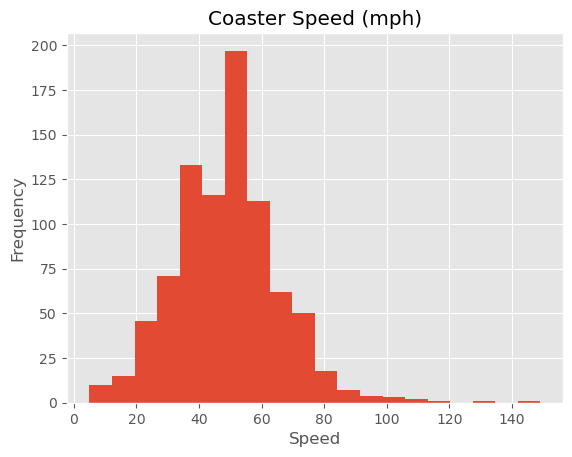

In [15]:
graph2 = df['Speed_mph'].plot(kind='hist', bins=20, title="Coaster Speed (mph)")
graph2.set_xlabel('Speed')
plt.show()

### 4. Relationship between features

#### Creating scatterplot using matplotlib

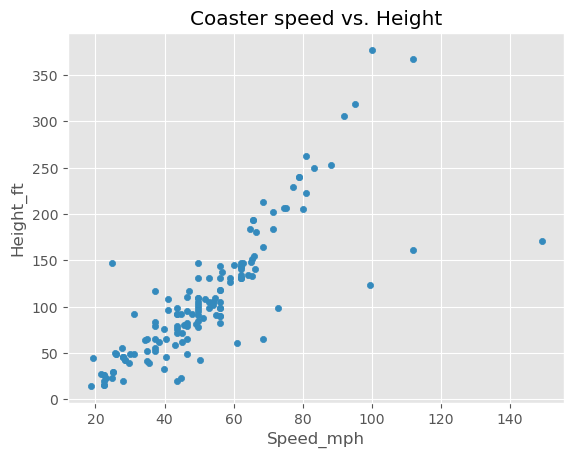

In [16]:
df.plot(kind='scatter', x='Speed_mph', y='Height_ft', title='Coaster speed vs. Height')
plt.show()

#### Creating scatterplot using seaborn

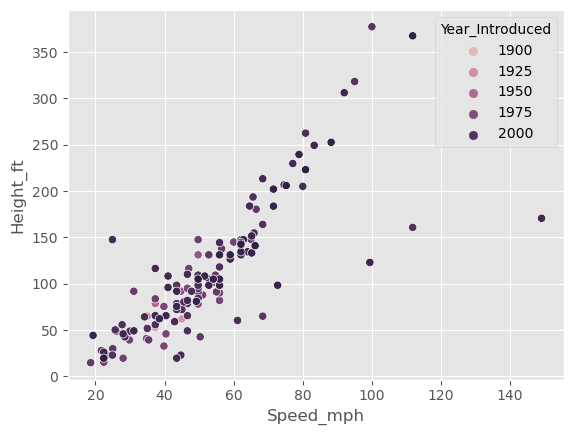

In [17]:
sns.scatterplot(x='Speed_mph', y='Height_ft', hue='Year_Introduced', data=df)
plt.show()

#### Creating pairplot

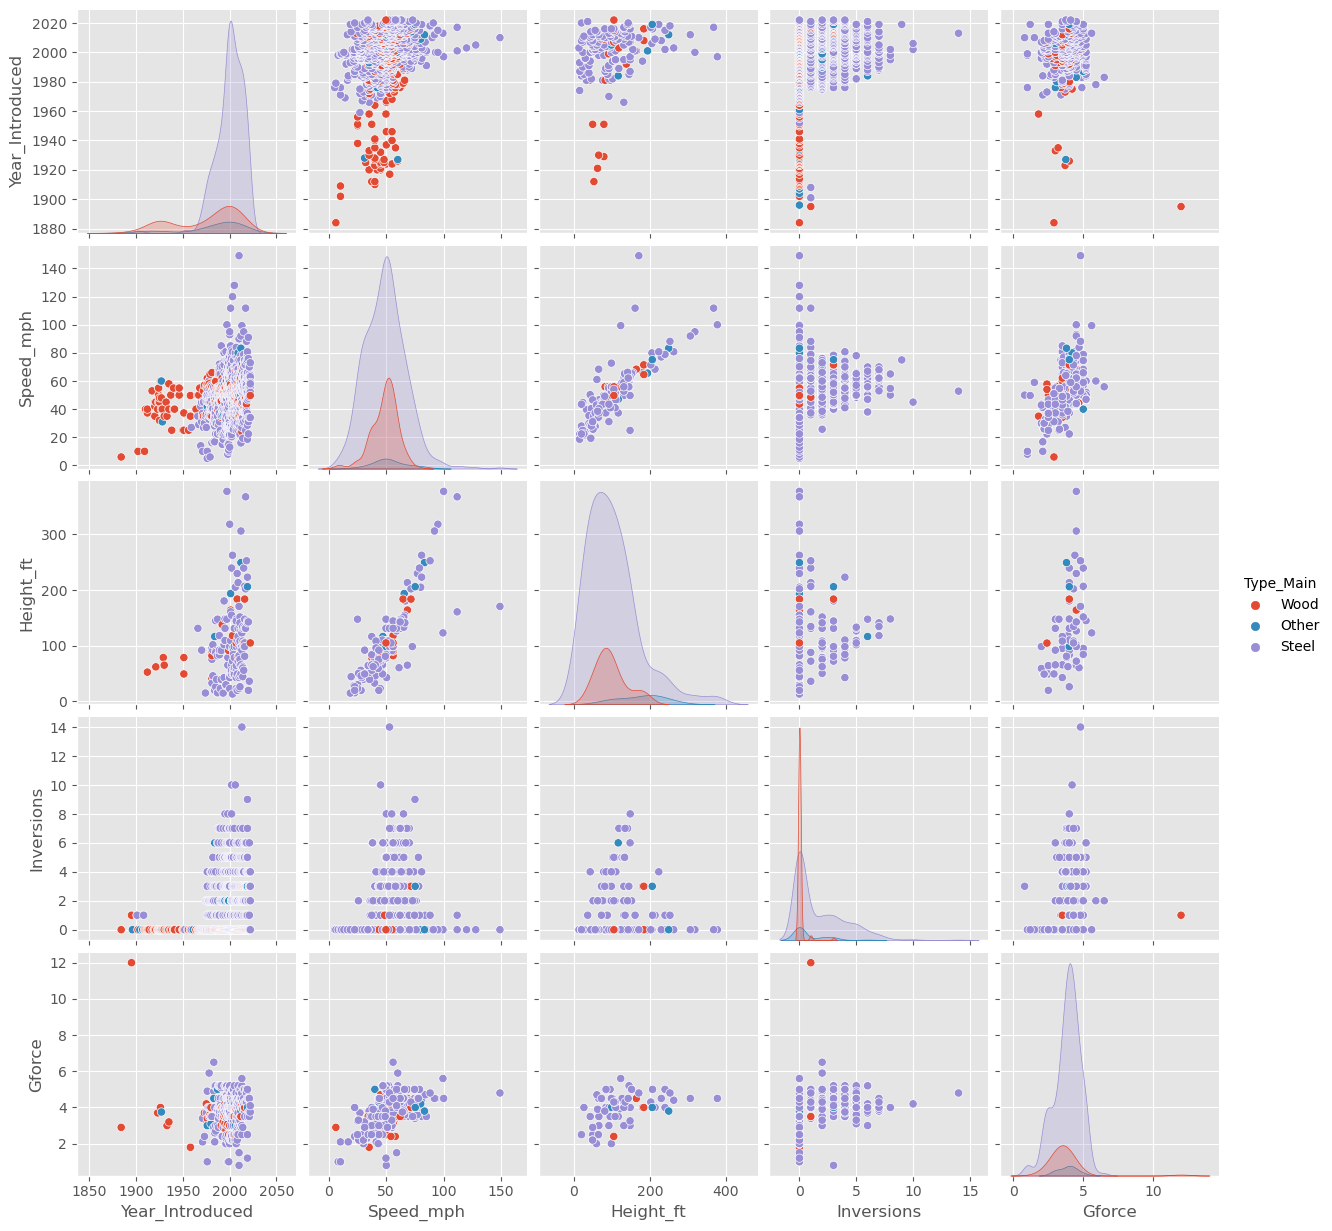

In [18]:
sns.pairplot(data=df, vars=['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce'], hue='Type_Main')
plt.show()

#### Looking for correlation

In [19]:
df_corr=df.drop(columns=['Latitude','Longitude']).corr(numeric_only=True)
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.225991,0.249487,0.233701,-0.073403
Speed_mph,0.225991,1.000000,0.823216,0.246593,0.503828
Height_ft,0.249487,0.823216,1.000000,0.138286,0.480465
Inversions,0.233701,0.246593,0.138286,1.000000,0.339137
Gforce,-0.073403,0.503828,0.480465,0.339137,1.000000


<Axes: >

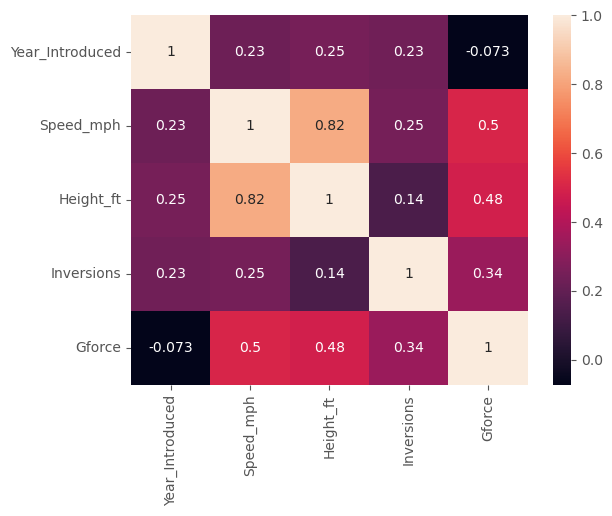

In [20]:
sns.heatmap(df_corr, annot=True)

## 5. Ask a Question about the data

What are the locations with the fastest roller coasters (minimum 10)?

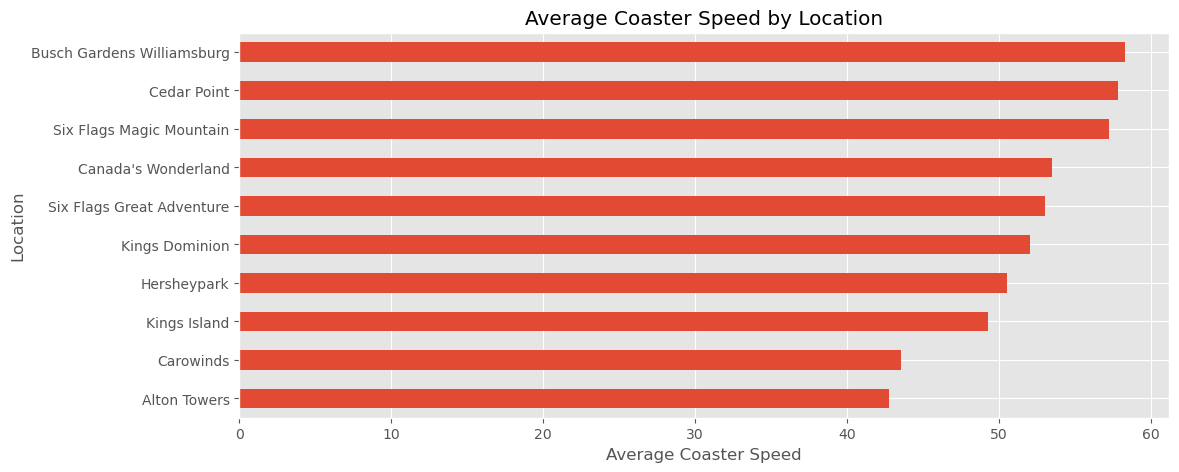

In [21]:
ax=df.query('Location != "Other"') \
.groupby('Location')['Speed_mph'] \
.agg(['mean','count']) \
.query('count >= 10') \
.sort_values('mean')['mean'] \
.plot(kind='barh', figsize=(12,5), title='Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()